In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

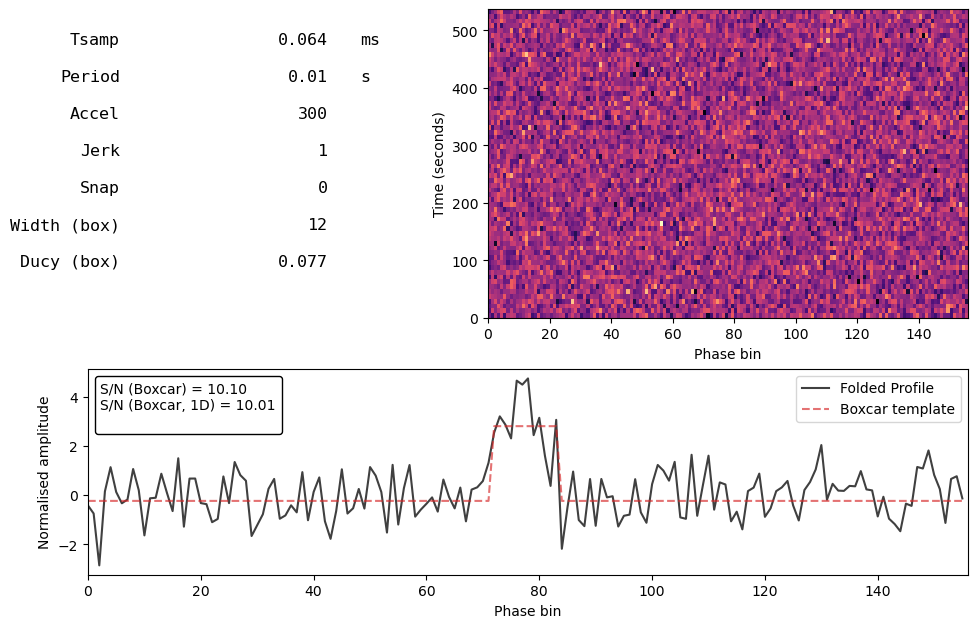

In [2]:
pulsar_period = 0.010
dt = 64e-6
accel = 300
jerk = 1
nsamps = 2**23
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 3 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-1.5, 1.5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=True)
ffa_plan, pgram = ffa_search(tim_data, search_cfg)

Param limits: [(np.float64(-1.5), np.float64(1.5)), (np.float64(-102.65318400000001), np.float64(702.653184)), (np.float64(99.95511100138201), np.float64(100.04488899861799))]
[2025-07-01 17:26:05.683] [info] PulsarSearchConfigClass: nsamps=8388608, tsamp=6.4e-05, nbins=64, tol_bins=3, ducy_max=0.2, wtsp=1.5, prune_poly_order=3, prune_n_derivs=3, bseg_brute=65536, bseg_ffa=8388608, use_fft_shifts=true, branch_max=16, nthreads=8
[2025-07-01 17:26:10.604] [info] FFACOMPLEX Memory Usage: 10.62 GB (11404977408 bytes)
[2025-07-01 17:26:11.030] [info] FFACOMPLEX::execute started
[2025-07-01 17:26:11.431] [info] FFACOMPLEX::initialize started
[2025-07-01 17:26:11.448] [info] FFACOMPLEX::initialize took 17 ms
[2025-07-01 17:26:12.965] [info] FFACOMPLEX::execute took 1934 ms


Computing FFA... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% :00s<00m:00s] 


In [4]:
print(pgram.get_indices_summary(true_values={"jerk": cfg.mod_kwargs["jerk"], "accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (57, 102, 256)
Best param indices: (np.int64(55), np.int64(102), np.int64(257), np.int64(4))
Best S/N: 8.68
Best Period: 0.009999991283697187
Best jerk: 0.9347826086956521
Best accel: 298.0548155362319
Best freq: 100.00008716310411
Best width: 6


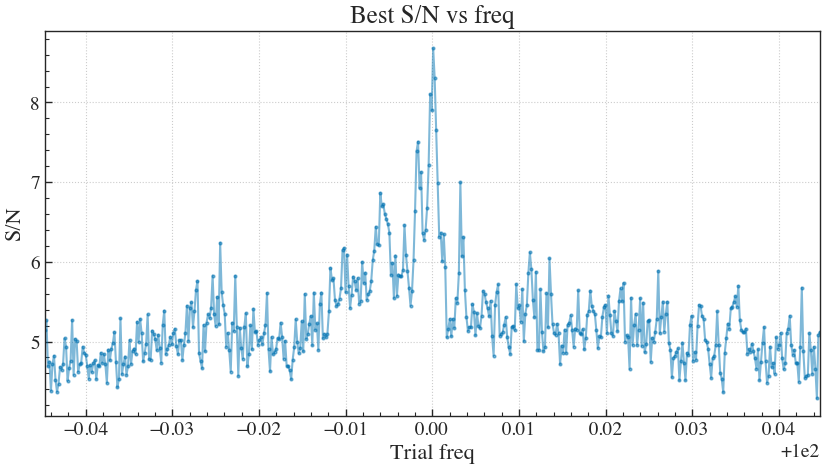

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

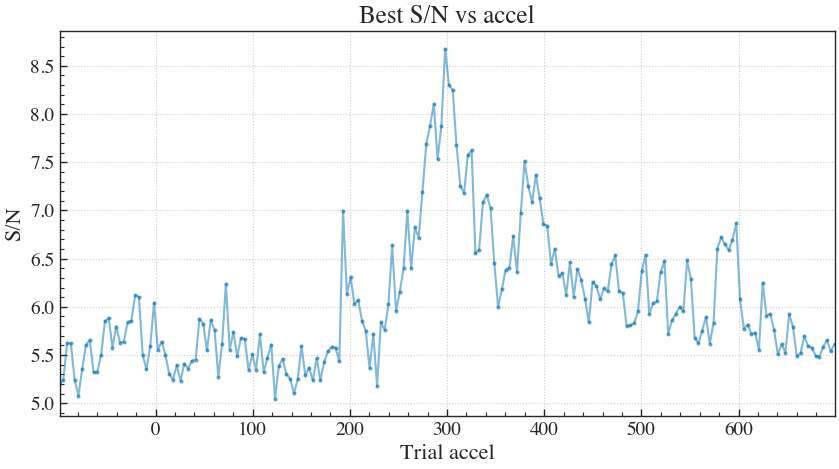

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

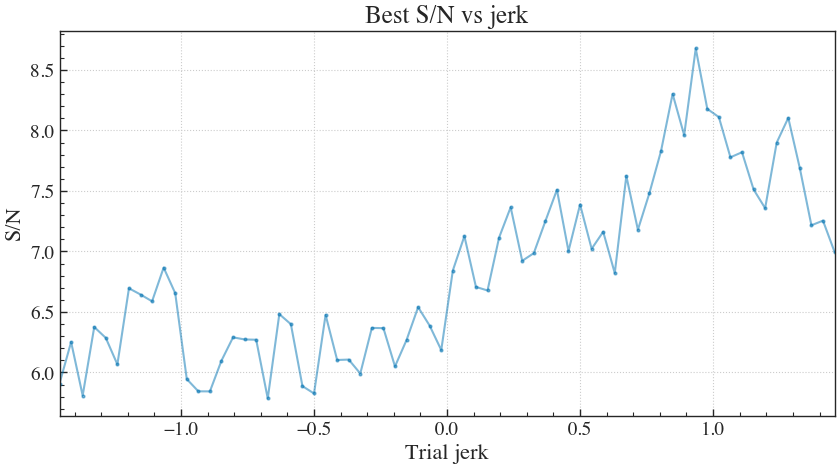

In [7]:
fig = pgram.plot_1d("jerk", figsize=(10, 5))
plt.show()

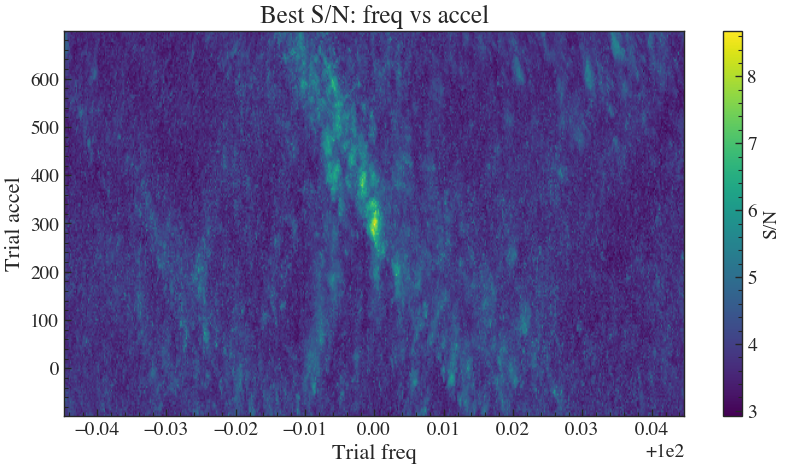

In [8]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

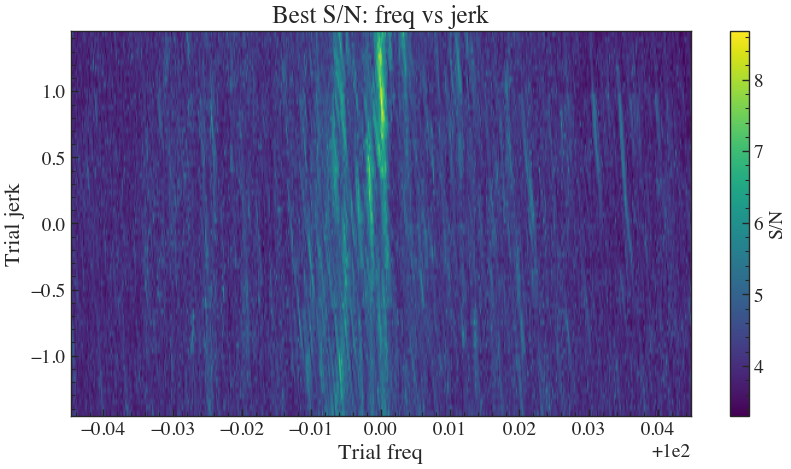

In [9]:
fig = pgram.plot_2d("freq", "jerk", figsize=(10, 5))
plt.show()

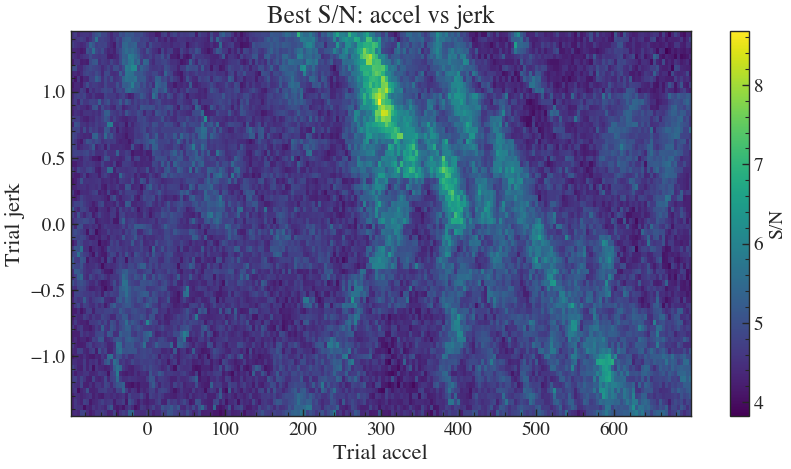

In [10]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()

In [11]:
ffa_plan.memory_usage / 2**30

10.621712923049927